In [114]:
import math 
import numpy as np 
import cv2 
from IPython.display import display, Image
from PIL import Image as pimg

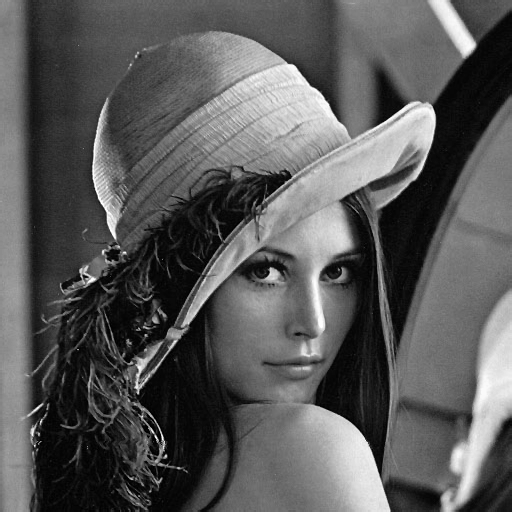

In [115]:
image_path = "lena.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image(filename='lena.png'))

In [116]:
matrix = np.array(img)
height, width = matrix.shape 
print(height)
print(width)
print(matrix)

512
512
[[140 140 140 ...  90  90  90]
 [140 140 140 ...  90  90  90]
 [135 135 143 ...  90  90  90]
 ...
 [109 109 113 ...  24  24  24]
 [106 106 110 ...  23  23  23]
 [106 106 110 ...  23  23  23]]


In [117]:
new_row = np.zeros(512, dtype=int)
new_matrix = np.insert(matrix, 0, new_row, axis=0)
new_matrix = np.insert(new_matrix, 1, new_row, axis=0)
new_matrix = np.insert(new_matrix, 514, new_row, axis=0)
new_matrix = np.insert(new_matrix, 515, new_row, axis=0)
new_column = np.zeros((new_matrix.shape[0], 2), dtype=int)
new_matrix = np.insert(new_matrix, [0,0], new_column, axis=1)
new_matrix = np.insert(new_matrix, [new_matrix.shape[1], new_matrix.shape[1]], new_column, axis=1)
height, width = new_matrix.shape 
print(height)
print(width)
print(new_matrix)

516
516
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 140 ...  90   0   0]
 ...
 [  0   0 106 ...  23   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


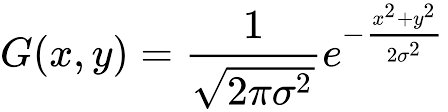

In [118]:
display(Image(filename='formula.png'))

Gaussian Smooting Filter  
sigma = 1   
kernel = 5x5 

In [119]:
result_list = []
def gaussian_filter(sigma, x, y):
    filter_value = (math.exp(-((abs(x)^2)+(abs(y)^2))/(2*(sigma^2))))/(2*math.pi*(sigma^2))
    return filter_value
for i in range(-2,3):
    for j in range(-2,3):
        result = gaussian_filter(1, i, j)
        result_list.append(result)
print(result_list)
first = result_list[0]
for i in range(25):
    result_list[i] = result_list[i]*(1/(first))
print(result_list)
for i in range(25):
    result_list[i] = int(result_list[i]*10)
print(result_list)

[0.05305164769729845, 0.03217745087668464, 0.038013166652644204, 0.03217745087668464, 0.05305164769729845, 0.03217745087668464, 0.019516610508106387, 0.023056151047594564, 0.019516610508106387, 0.03217745087668464, 0.038013166652644204, 0.023056151047594564, 0.027237624120679014, 0.023056151047594564, 0.038013166652644204, 0.03217745087668464, 0.019516610508106387, 0.023056151047594564, 0.019516610508106387, 0.03217745087668464, 0.05305164769729845, 0.03217745087668464, 0.038013166652644204, 0.03217745087668464, 0.05305164769729845]
[1.0, 0.6065306597126334, 0.7165313105737893, 0.6065306597126334, 1.0, 0.6065306597126334, 0.36787944117144233, 0.4345982085070782, 0.36787944117144233, 0.6065306597126334, 0.7165313105737893, 0.4345982085070782, 0.513417119032592, 0.4345982085070782, 0.7165313105737893, 0.6065306597126334, 0.36787944117144233, 0.4345982085070782, 0.36787944117144233, 0.6065306597126334, 1.0, 0.6065306597126334, 0.7165313105737893, 0.6065306597126334, 1.0]
[10, 6, 7, 6, 10,

In [120]:
new_matrix_2 = np.zeros_like(new_matrix)
for y in range(2, height - 2):
    for x in range(2, width - 2):
        new_matrix_2[y,x] = ((new_matrix[y-2,x-2]*10) + (new_matrix[y-2,x-1]*6) + (new_matrix[y-2,x]*7) + (new_matrix[y-2,x+1]*6) + (new_matrix[y-2,x+2]*10) + (new_matrix[y-1,x-2]*6) + (new_matrix[y-1,x-1]*3) + (new_matrix[y-1,x]*4) + (new_matrix[y-1,x+1]*3) + (new_matrix[y-1,x-2]*6) + (new_matrix[y,x-2]*7) + (new_matrix[y,x-1]*4) + (new_matrix[y,x]*5) + (new_matrix[y,x+1]*4) + (new_matrix[y,x-2]*7) + (new_matrix[y+1,x-2]*6) + (new_matrix[y+1,x-1]*3) + (new_matrix[y+1,x]*4) + (new_matrix[y+1,x+1]*3) + (new_matrix[y+1,x-2]*6) + (new_matrix[y+2,x-2]*10) + (new_matrix[y+2,x-1]*6) + (new_matrix[y+2,x]*7) + (new_matrix[y+2,x+1]*6) + (new_matrix[y+2,x-2]*10))/149
print(new_matrix_2)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 26 ... 45  0  0]
 ...
 [ 0  0 28 ... 10  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [121]:
row_indices_to_remove = [0, 1, 514, 515]
column_indices_to_remove = [0, 1, new_matrix_2.shape[1] - 2, new_matrix_2.shape[1] - 1]
new_matrix_3 = np.delete(new_matrix_2, row_indices_to_remove, axis=0)
new_matrix_3 = np.delete(new_matrix_3, column_indices_to_remove, axis=1)
height, width = new_matrix_3.shape 
print(height)
print(width)
print(new_matrix_3)

512
512
[[ 26  39  81 ...  52  52  45]
 [ 33  48 102 ...  66  66  57]
 [ 54  75 139 ...  89  84  71]
 ...
 [ 44  60 112 ...  24  22  18]
 [ 33  46  83 ...  18  16  13]
 [ 28  38  66 ...  14  12  10]]


In [122]:
print(np.min(new_matrix_3))
print(np.max(new_matrix_3))

2
250


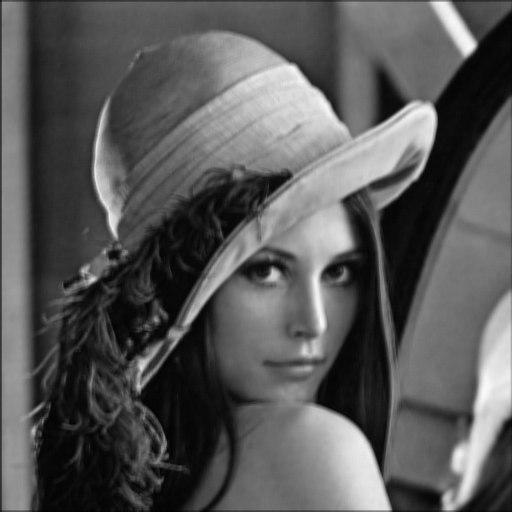

In [123]:
cv2.imwrite('new_lena.png', new_matrix_3.astype(np.uint8))
display(Image(filename='new_lena.png'))

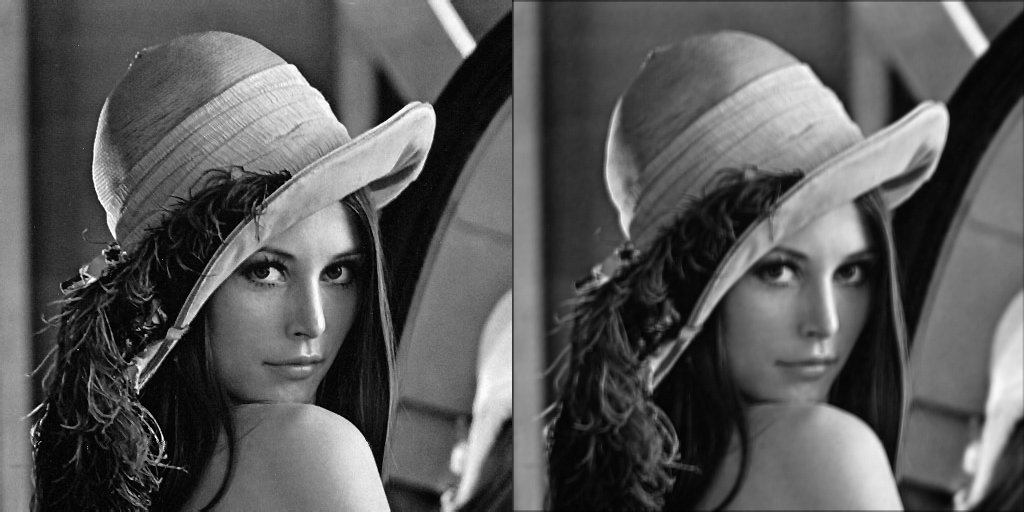

In [124]:
image1 = pimg.open('lena.png')
image2 = pimg.open('new_lena.png')
combined_image = pimg.new('RGB', (image1.width + image2.width, image1.height))
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (image1.width, 0))
display(combined_image)